<a href="https://colab.research.google.com/github/iznue/data_analysis/blob/main/practice6_drinkcsv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df=pd.read_csv('drinks.csv')
display(df.head())
nRow, nCol = df.shape # 가로 세로 갯수 출력
print(f'There are {nRow} rows and {nCol} columns')

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


There are 193 rows and 6 columns


In [30]:
df.info() # info 명령을 이용해서도 가로 세로 갯수 확인 가능
# 193개의 행과 6개의 열로 구성
# 각 필드의 feature 값들은 type을 가지고 있음
# ex) continent 170 non-null : 몇 개의 결측치를 가지고 있음을 확인 가능
# dtype : 데이터 형, 형 확인 = 형 변환 -> 타입에 대한 얘기

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [31]:
# dtype 확인
df['country'].dtype
# object(문자열)이므로 '0' 출력

dtype('O')

In [32]:
# 데이터 분석 시 일일이 확인히 어려우므로
# 데이터 컬럼 명을 보는 기능이 중요함
#df.columns
"""
for cnt,i in enumerate(df.columns):
    print(cnt, i, '->', df[i].dtype)
"""
# list comprehension
[print(cnt, i, '->', df[i].dtype) for cnt,i in enumerate(df.columns)] 
# [None, None, None, None, None, None]
# 위의 작업이 list에 append 되지 않으며 6개 데이터 객체에 관한 부분이 비어있음을 보여줌

0 country -> object
1 beer_servings -> int64
2 spirit_servings -> int64
3 wine_servings -> int64
4 total_litres_of_pure_alcohol -> float64
5 continent -> object


[None, None, None, None, None, None]

In [33]:
# 특정 컬럼만 보고 싶은 경우
"""
for cnt,i in enumerate(df.columns):
    if df[i].dtype == 'int64':
        print(cnt, i, '->', df[i].dtype)
"""
# 여러 개의 형식 확인 (or도 사용 가능)
typelist = ['int64', 'int32', 'float64', 'float32']
for cnt,i in enumerate(df.columns):
    if df[i].dtype in typelist:
    #if df[i].dtype not in typelist:
        print(cnt, i, '->', df[i].dtype)     

1 beer_servings -> int64
2 spirit_servings -> int64
3 wine_servings -> int64
4 total_litres_of_pure_alcohol -> float64


**결측값 handling**

In [40]:
# 결측값 : notna(), isnull()
#df.isna().sum() # 전체적으로 몇 개의 에러(na : 결측값)가 있는지 확인
tmp = df.isna().sum()
tmp/len(df) # 결측값이 몇 %로 있는지 확인

# 결측값이 어디 있는지 확인
df[df['continent'].isnull()] 
# 위 작업으로 나온 nan 값이 데이터를 수집하지 못해서 나온 값인지 
# 또는 데이터를 0으로 넣었어야 하는데 넣지 않아 나온 nan 값인지 구별 할 수 없음
# 추측으로 이를 0으로 바꾼 이유를 명확히 설명할 수 있어야 함

# 'continent'의 unique 값 확인 
df['continent'].unique()
# 5개의 대륙으로 나눔, nan은 국가가 어느 대륙에 속한지 값으로 넣어줌 -> 별도로 필드 생성

# nan이 아닌 것만 확인 : notna()
# df[df['continent'].notna()]

# nan 값의 문제 : sum 명령 수행 시 nan은 무시하고 수행 -> 비중 확인 시 전체 데이터가 nan으로 나옴
# df['spirit_servings']/df['spirit_servings'].sum()
# nan 값이 있으면 통계 또는 집계를 낼 때 문제 발생
# nan data는 출력x 옵션 제공
df['spirit_servings'].sum(skipna=False)
# 근본적으로는 isna() 또는 isna().sum()을 이용해 결측값을 확인하고
# 어떻게 처리할 것인지 명확하게 보는 것이 좋음
# 결측값을 모두 0으로 처리하기 전 현재 알코올 소비량을 0으로 해서는 안되는 것을 확인함 -> 결측값과 비슷한 이슈가 발생하므로
# 따라서 데이터 필터링 수행

15632

In [43]:
df[df['beer_servings']==0]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
13,Bangladesh,0,0,0,0.0,AS
40,Cook Islands,0,254,74,5.9,OC
46,North Korea,0,0,0,0.0,AS
79,Iran,0,0,0,0.0,AS
90,Kuwait,0,0,0,0.0,AS
97,Libya,0,0,0,0.0,AF
103,Maldives,0,0,0,0.0,AS
106,Marshall Islands,0,0,0,0.0,OC
107,Mauritania,0,0,0,0.0,AF


In [47]:
# 결측값 0으로 채우기
df['spirit_servings'] = df['spirit_servings'].fillna(0)
df['continent'] = df['continent'].fillna('x') # 대륙의 경우 모른다는 의미로 x로 채움

df.isna().sum()

country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

**Feature 생성**

In [50]:
# 결측치를 채우기 전 0값이 존재하는지 확인하는 작업 필요
df[df['country'].str.contains('Ko')]
# pandas로 필터링 진행 시에 데이터 프레임명 안쪽에 필드명을 쓰고 그 자료를 다시 감싸줘야함
# 다음과 같이 하지 않는 경우 true false 값만 나옴

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,beer%
46,North Korea,0,0,0,0.0,AS,0.000000
138,South Korea,140,16,9,9.8,AS,0.006833


In [51]:
# 각 술이 전체의 몇% 비율인지
df['beer%'] = df['beer_servings']/df['beer_servings'].sum()
df['sprit%'] = df['spirit_servings']/df['spirit_servings'].sum()
df['wine%'] = df['wine_servings']/df['wine_servings'].sum()

df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,beer%,sprit%,wine%
0,Afghanistan,0,0,0,0.0,AS,0.000000,0.000000,0.000000
1,Albania,89,132,54,4.9,EU,0.004344,0.008444,0.005658
2,Algeria,25,0,14,0.7,AF,0.001220,0.000000,0.001467
3,Andorra,245,138,312,12.4,EU,0.011958,0.008828,0.032691
4,Angola,217,57,45,5.9,AF,0.010591,0.003646,0.004715


In [52]:
# 각 술이 한국에서 몇%의 비율인지
df[df['country'].str.contains('Ko')]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,beer%,sprit%,wine%
46,North Korea,0,0,0,0.0,AS,0.000000,0.000000,0.000000
138,South Korea,140,16,9,9.8,AS,0.006833,0.001024,0.000943


In [55]:
# AS 지역에서 몇 % 비율을 차지하고 있는지
df[df['continent'] == 'AS']

# 차트를 통해 데이터의 분포도를 빠르게 확인 가능 또는 SORT 사용
temp = df[df['continent'] == 'AS']
temp.sort_values(by='beer%', ascending=False) # ascending=Fasle : 내림차순

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,beer%,sprit%,wine%
141,Russian Federation,247,326,73,11.5,AS,0.012055,0.020855,0.007649
138,South Korea,140,16,9,9.8,AS,0.006833,0.001024,0.000943
87,Kazakhstan,124,246,12,6.8,AS,0.006052,0.015737,0.001257
189,Vietnam,111,2,1,2.0,AS,0.005418,0.000128,0.000105
169,Thailand,99,258,1,6.4,AS,0.004832,0.016505,0.000105
36,China,79,192,8,5.0,AS,0.003856,0.012282,0.000838
112,Mongolia,77,189,8,4.9,AS,0.003758,0.012091,0.000838
85,Japan,77,202,16,7.0,AS,0.003758,0.012922,0.001676
134,Philippines,71,186,1,4.6,AS,0.003465,0.011899,0.000105
82,Israel,63,69,9,2.5,AS,0.003075,0.004414,0.000943


In [59]:
# AS 대륙에서의 RANK
temp['beer_rank'] = temp['beer%'].rank(ascending=False, na_option='top')
temp['sprit_rank'] = temp['sprit%'].rank(ascending=False, na_option='top')
temp['wine_rank'] = temp['wine%'].rank(ascending=False, na_option='top')
temp['total_rank'] = temp['total_litres_of_pure_alcohol'].rank(ascending=False, na_option='top')
temp[temp['country'] == 'South Korea']

<ipython-input-59-ccbacd1ce3ca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['beer_rank'] = temp['beer%'].rank(ascending=False, na_option='top')
<ipython-input-59-ccbacd1ce3ca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['sprit_rank'] = temp['sprit%'].rank(ascending=False, na_option='top')
<ipython-input-59-ccbacd1ce3ca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,beer%,sprit%,wine%,beer_rank,sprit_rank,wine_rank,total_rank
138,South Korea,140,16,9,9.8,AS,0.006833,0.001024,0.000943,2.0,22.5,9.5,2.0


In [60]:
# 전세계에서의 RANK (%로 보았을 때)
allCountry = df
allCountry['beer_rank'] = allCountry['beer%'].rank(ascending=False, na_option = 'top')
allCountry['sprit_rank'] = allCountry['sprit%'].rank(ascending=False, na_option = 'top')
allCountry['wine_rank'] = allCountry['wine%'].rank(ascending=False, na_option = 'top')
allCountry['total_rank'] = allCountry['total_litres_of_pure_alcohol'].rank(ascending=False, na_option = 'top')
allCountry[allCountry['country'] == 'South Korea']

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,beer%,sprit%,wine%,beer_rank,sprit_rank,wine_rank,total_rank
138,South Korea,140,16,9,9.8,AS,0.006833,0.001024,0.000943,66.0,129.5,93.5,28.0


**상관도**

In [62]:
# 상관도 구하기 : X값이 변할 때 Y값의 비율 변화 
# +1에 가까울 수록 상관도가 높고 -1에 가까울 수록 상관도가 낮음

df[['spirit_servings', 'wine_servings']].corr()
# 상관관계를 구하고 싶은 항목을 리스트에 넣고 correlation 함수 사용
# 대각선을 기준으로 위 또는 아래를 확인 -> 0.19의 상관관계가 있음
# 상관도가 굉장히 낮다는 것을 알 수 있음

,spirit_servings,wine_servings
spirit_servings,1.000000,0.194797
wine_servings,0.194797,1.000000


In [63]:
# 모든 데이터의 상관도 확인 -> 숫자로 되어있는 데이터 셋만 확인 가능
df.corr()
# 맥주와 독주의 관계가 맥주와 와인의 관계보다 조금 낮은 값으로 구성되어 있음
# 맥주 데이터는 전체 데이터와 더 밀접한 관계가 있음을 확인 가능

<ipython-input-63-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,beer%,sprit%,wine%,beer_rank,sprit_rank,wine_rank,total_rank
beer_servings,1.000000,0.458819,0.527172,0.835839,1.000000,0.458819,0.527172,-0.952790,-0.562448,-0.659996,-0.830207
spirit_servings,0.458819,1.000000,0.194797,0.654968,0.458819,1.000000,0.194797,-0.491970,-0.914176,-0.423301,-0.650592
wine_servings,0.527172,0.194797,1.000000,0.667598,0.527172,0.194797,1.000000,-0.530676,-0.302612,-0.788970,-0.634801
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000,0.835839,0.654968,0.667598,-0.850022,-0.692069,-0.739770,-0.984410
beer%,1.000000,0.458819,0.527172,0.835839,1.000000,0.458819,0.527172,-0.952790,-0.562448,-0.659996,-0.830207
sprit%,0.458819,1.000000,0.194797,0.654968,0.458819,1.000000,0.194797,-0.491970,-0.914176,-0.423301,-0.650592
wine%,0.527172,0.194797,1.000000,0.667598,0.527172,0.194797,1.000000,-0.530676,-0.302612,-0.788970,-0.634801
beer_rank,-0.952790,-0.491970,-0.530676,-0.850022,-0.952790,-0.491970,-0.530676,1.000000,0.620381,0.716275,0.876315
sprit_rank,-0.562448,-0.914176,-0.302612,-0.692069,-0.562448,-0.914176,-0.302612,0.620381,1.000000,0.554264,0.724381
wine_rank,-0.659996,-0.423301,-0.788970,-0.739770,-0.659996,-0.423301,-0.788970,0.716275,0.554264,1.000000,0.752233


**시각화**

<ipython-input-68-66051e269963>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='viridis', annot=True, linewidth=0.5)


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 [Text(0, 0.5, 'beer_servings'),
  Text(0, 1.5, 'spirit_servings'),
  Text(0, 2.5, 'wine_servings'),
  Text(0, 3.5, 'total_litres_of_pure_alcohol'),
  Text(0, 4.5, 'beer%'),
  Text(0, 5.5, 'sprit%'),
  Text(0, 6.5, 'wine%'),
  Text(0, 7.5, 'beer_rank'),
  Text(0, 8.5, 'sprit_rank'),
  Text(0, 9.5, 'wine_rank'),
  Text(0, 10.5, 'total_rank')])

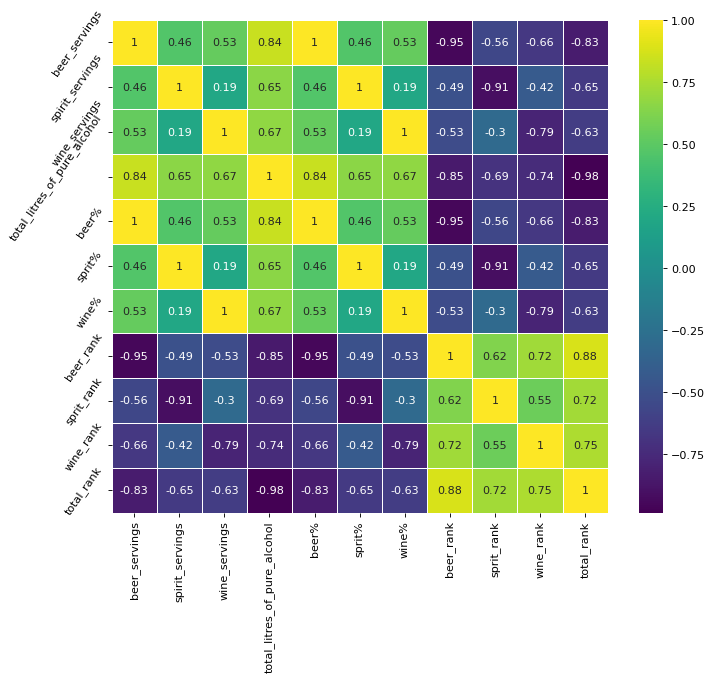

In [68]:
# 상관도 데이터 시각화 
plt.figure(figsize = (10,8), dpi = 80)
sns.heatmap(df.corr(), cmap='viridis', annot=True, linewidth=0.5) 
# seaborn의 heatmap 사용
plt.yticks(rotation=55)

# 우측 색상표를 기준으로 빠르게 상관도 확인 가능

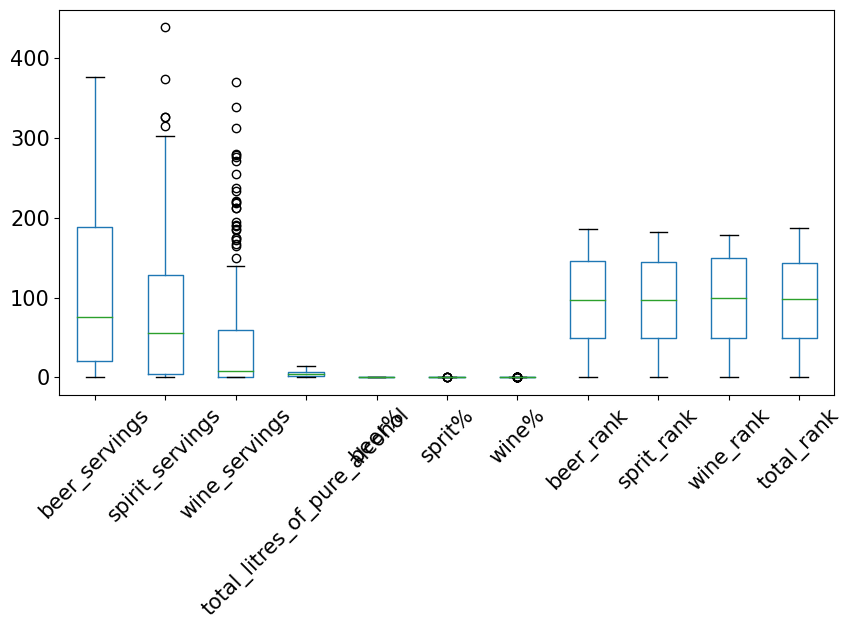

In [69]:
# boxplot : 데이터의 이상치 검색
plt.figure(figsize=(10,5))
boxplot = df.boxplot(grid=False, rot=45, fontsize=15)
# 이상치 데이터 : 전체 데이터의 4분의 1을 나눠주고 3,4분위 위에서 15% 초과하는 데이터
# 와인 데이터를 통해 대부분의 나라는 box 범위에 속하지만
# 몇몇 나라가 와인의 소비량이 꽤 많음을 알 수 있음
# boxplot이 아래로 내려올 수록 아래쪽 데이터셋이 많음
# 와인의 소비량이 100이상인 나라들은 무엇일지 필터링 필요

In [75]:
tmp = df[df['wine_servings']>=180]
tmp['continent'].value_counts()
# EU 지역이 와인 소비량의 이상치가 비교적 많음을 알 수 있음

EU    16
SA     2
OC     1
AF     1
Name: continent, dtype: int64

In [76]:
df.describe()
# 중간 데이터는 8인것에 비해 max(370)와 min(0)의 차이가 큼
# 편차(std)가 79로 꽤 높음
# 맥주와 독주는 max값에 비해 75%의 값이 크게 차이나지 않음
# 따라서 와인의 경우 이상치 데이터를 계속 가져갈 지 이를 버릴지는 고민해봐야 함

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,beer%,sprit%,wine%,beer_rank,sprit_rank,wine_rank,total_rank
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098,0.005181,0.005181,0.005181,97.000000,97.000000,97.000000,97.000000
std,101.143103,88.284312,79.697598,3.773298,0.004936,0.005648,0.008351,55.842715,55.803552,55.671446,55.843648
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,20.000000,4.000000,1.000000,1.300000,0.000976,0.000256,0.000105,49.000000,49.000000,49.500000,49.000000
50%,76.000000,56.000000,8.000000,4.200000,0.003709,0.003582,0.000838,96.500000,97.000000,100.000000,98.500000
75%,188.000000,128.000000,59.000000,7.200000,0.009176,0.008188,0.006182,145.500000,145.000000,150.000000,143.500000
max,376.000000,438.000000,370.000000,14.400000,0.018351,0.028019,0.038768,186.000000,182.000000,178.000000,187.000000


In [79]:
tmp = df[df['wine_servings']<180]
tmp.describe()

# 이상치를 제거한 나머지를 확인했을 때 평균 소비량이 26으로 나옴 (이전의 49와 차이가 발생)
# 데이터값에 있어 이상치를 무조건적으로 제거할 수는 없음
# 상황에 따라 근거를 명확히 두고 제거해야함

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,beer%,sprit%,wine%,beer_rank,sprit_rank,wine_rank,total_rank
count,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.00000,173.000000
mean,95.196532,80.289017,26.959538,4.150289,0.004646,0.005136,0.002825,103.289017,99.049133,107.00000,104.895954
std,99.010550,91.789241,43.282920,3.518929,0.004832,0.005872,0.004535,55.088145,57.424664,49.85199,53.168290
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,21.50000,1.000000
25%,17.000000,3.000000,1.000000,1.000000,0.000830,0.000192,0.000105,58.000000,48.000000,64.00000,62.500000
50%,56.000000,42.000000,7.000000,3.500000,0.002733,0.002687,0.000733,107.500000,103.500000,108.00000,107.000000
75%,157.000000,131.000000,31.000000,6.600000,0.007663,0.008380,0.003248,150.000000,150.500000,150.00000,151.500000
max,376.000000,438.000000,175.000000,14.400000,0.018351,0.028019,0.018336,186.000000,182.000000,178.00000,187.000000


In [82]:
tmp = df[df['wine_servings']>180]
tmp['wine_servings'].sum()

4880

In [81]:
df['wine_servings'].sum()

9544

In [85]:
print(tmp['wine_servings'].sum() / df['wine_servings'].sum())
# 180보다 큰 데이터셋이 전체의 51%를 차지함

print(tmp['wine_servings'].sum(), df['wine_servings'].sum())
len(tmp), len(df)
# 180보다 큰 데이터의 수와 전체 데이터 수 출력 
# len으로 확인하는 것이 좋음
# 20 밖에 안되지만 합산이 큰 것을 확인할 수 있음

# 데이터의 갯수와 상관없이 전체 sum이 전반적인 dataset에 얼마나 미치는지 확인 가능
# 이를 확인하기에는 boxplot이 빠르게 데이터를 인식시킬 수 있는 방법임

0.5113160100586757
4880 9544


(20, 193)